In [1]:
import QuantLib as ql
from datetime import date
import pandas
import plotly.express as px
import csv

In [2]:
# one option example
# http://gouthamanbalaraman.com/blog/american-option-pricing-quantlib-python.html

# date_mat = ql.Date(31, 12, 2019)
# price_spot = 105
# price_strike = 100
# vol = 0.2
# dividend_rate = 0.02
# option_type = ql.Option.Call

# risk_free_rate = 0.0153
# day_count = ql.Actual365Fixed()
# calendar = ql.UnitedStates()

# date_calc = ql.Date(17, 12, 2019)
# ql.Settings.instance().evaluationDate = date_calc

# payoff = ql.PlainVanillaPayoff(option_type, price_strike)
# settlement = date_calc
# am_exercise = ql.AmericanExercise(settlement, date_mat)
# american_option = ql.VanillaOption(payoff, am_exercise)

# spot_handle = ql.QuoteHandle(ql.SimpleQuote(price_spot))
# flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(date_calc, risk_free_rate, day_count))
# dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(date_calc, dividend_rate, day_count))
# flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(date_calc, calendar, vol, day_count))

# bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)

# steps = 200

# binomial_engine = ql.BinomialVanillaEngine(bsm_process, 'crr', steps)
# american_option.setPricingEngine(binomial_engine)
# print (american_option.NPV())

In [3]:
def npv_single(date_mat, 
               price_spot, 
               price_strike, 
               vol, 
               option_type, 
               risk_free_rate, 
               date_calc,
               dividend_rate=0,
               steps=200):
    if date_mat < date_calc:
        return 0
    
    day_count = ql.Actual365Fixed()
    calendar = ql.UnitedStates()

    ql.Settings.instance().evaluationDate = date_calc

    payoff = ql.PlainVanillaPayoff(option_type, price_strike)
    settlement = date_calc
    am_exercise = ql.AmericanExercise(settlement, date_mat)
    american_option = ql.VanillaOption(payoff, am_exercise)

    spot_handle = ql.QuoteHandle(ql.SimpleQuote(price_spot))
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(date_calc, risk_free_rate, day_count))
    dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(date_calc, dividend_rate, day_count))
    flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(date_calc, calendar, vol, day_count))

    bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)

    binomial_engine = ql.BinomialVanillaEngine(bsm_process, 'crr', steps)
    american_option.setPricingEngine(binomial_engine)
    
    return american_option.NPV()

def npv_portfolio(options, date_calc=None):
    
    def call_npv(option, date_calc):
        
        date_mat = ql.DateParser.parse(option['date_mat'], '%m/%d/%Y')
        price_spot = option['price_spot']
        price_strike = option['price_strike']
        vol = option['vol']
        option_type = ql.Option.Call if option['option_type'] == 'call' else ql.Option.Put
        risk_free_rate = option['risk_free_rate']
        date_calc = ql.DateParser.parse(date_calc, '%m/%d/%Y') if date_calc is not None else ql.Date(date.today().day, date.today().month, date.today().year)
        
#         print('Calculating NPV on %s for %s' % (date_calc, option))
        
        return npv_single(date_mat, price_spot, price_strike, vol, option_type, risk_free_rate, date_calc)
        
    npvs = [call_npv(option, date_calc) for option in options]
    return npvs

In [4]:
npv_single(ql.Date(31, 12, 2019), 105, 100, 0.2, ql.Option.Call, 0.0153, ql.Date(17, 12, 2019))

5.256971896281935

In [5]:
# you can input it as a series of dicts like this
options = [
    {'date_mat': '12/31/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153},
    {'date_mat': '12/31/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'put', 'risk_free_rate': 0.0153},
    {'date_mat': '12/14/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153}
]

print(options)

# or read it as a CSV:
with open('input.csv') as f:
    def try_parse(i):
        try:
            return float(i)
        except ValueError:
            return i
    
    options = [{k: try_parse(v) for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True)]

print(options)

[{'date_mat': '12/31/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153}, {'date_mat': '12/31/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'put', 'risk_free_rate': 0.0153}, {'date_mat': '12/14/2019', 'price_spot': 150, 'price_strike': 145, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153}]
[{'date_mat': '12/31/2019', 'price_spot': 150.0, 'price_strike': 145.0, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153}, {'date_mat': '12/31/2019', 'price_spot': 150.0, 'price_strike': 145.0, 'vol': 0.1, 'option_type': 'put', 'risk_free_rate': 0.0153}, {'date_mat': '12/14/2019', 'price_spot': 150.0, 'price_strike': 145.0, 'vol': 0.1, 'option_type': 'call', 'risk_free_rate': 0.0153}]


In [6]:
# single day
npv_single_day = npv_portfolio(options, '12/15/2019')
print('NPV for the portfolio on a single day')
print(npv_single_day)

NPV for the portfolio on a single day
[5.160771469992204, 0.06373640388023276, 0]


In [7]:
# date range
dates = list(pandas.date_range('12/1/2019', '12/17/2019').strftime('%m/%d/%Y'))
npvs = [sum(npv_portfolio(options, date)) for date in dates]
print('NPV for the portfolio through many days')
print(dates)
print(npvs)
# NPV jumps on 12/15 because one of the call options expires at 12/14

NPV for the portfolio through many days
['12/01/2019', '12/02/2019', '12/03/2019', '12/04/2019', '12/05/2019', '12/06/2019', '12/07/2019', '12/08/2019', '12/09/2019', '12/10/2019', '12/11/2019', '12/12/2019', '12/13/2019', '12/14/2019', '12/15/2019', '12/16/2019', '12/17/2019']
[10.749238942389724, 10.704640863591793, 10.660393784725297, 10.616530476295633, 10.572818807231293, 10.533564863217965, 10.495375084179667, 10.457573169750974, 10.420062550922573, 10.381966629360743, 10.349532054451956, 10.311536502606305, 10.282241319495178, 5.249110061827135, 5.224507873872437, 5.1992479254020125, 5.175721932161299]


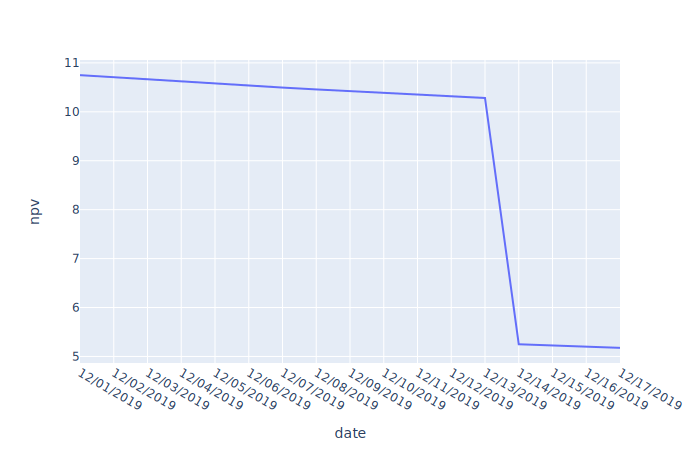

In [10]:
# plotting
df_plot = pandas.DataFrame({'date': dates, 'npv': npvs})
fig = px.line(df_plot, x='date', y='npv')

fig.show()